# Einführung in Pandas – Datenanalyse für die Praxis

In dieser Lektion stellen wir **Pandas** vor – eine leistungsstarke Bibliothek zur Datenanalyse und -manipulation in Python. 

## Reales Szenario: Analyse eines Online-Shops

In diesem Notebook arbeiten wir mit einem durchgängigen Beispiel: Du bist **Datenanalyst bei einem Online-Shop** und sollst verschiedene Datensätze analysieren, um dem Management wichtige Erkenntnisse zu liefern. Dabei wirst du:

- Verkaufsdaten aus verschiedenen Formaten importieren (CSV, Excel, JSON)
- Die Datenqualität überprüfen und bereinigen
- Trends und Muster erkennen
- Daten filtern, gruppieren und aggregieren

Diese Fähigkeiten sind essenziell, um in einer datengetriebenen Welt fundierte Geschäftsentscheidungen treffen zu können.

## 1. Einführung in Pandas

**Was ist Pandas?**

- Pandas ist eine Open-Source-Python-Bibliothek zur Datenanalyse und -manipulation
- Sie stellt leistungsstarke Datenstrukturen (DataFrame und Series) bereit
- Ideal für den Umgang mit Daten aus CSV-, Excel-, JSON- oder Datenbankquellen
- Der Name kommt von "**Pan**el **Da**ta" – eine Bezeichnung für multidimensionale Datensätze

### Installation und Import

```bash
conda install pandas -y
# oder
pip install pandas
```

In [1]:
# Importiere Pandas
import pandas as pd

# Kurze Überprüfung der Version
print('Pandas Version:', pd.__version__)

Pandas Version: 2.2.3


## 2. Grundlegende Datenstrukturen: Series und DataFrame

### Was sind Series und DataFrames?

| Struktur | Beschreibung | Analogie |
|----------|--------------|----------|
| **Series** | Eindimensional, wie eine Spalte in einer Tabelle | Eine Liste mit Index |
| **DataFrame** | Zweidimensional, wie eine komplette Tabelle | Eine Excel-Tabelle |

### Praxisbeispiel: Produktdaten erstellen

Stell dir vor, du erstellst eine einfache Produktliste für den Online-Shop.

### Erstellen einer Series – z.B. Tagesverkäufe

In [2]:
# Tagesverkäufe der letzten Woche
tagesverkaeufe = pd.Series(
    [1250, 980, 1340, 1100, 1560, 2100, 1890],
    index=['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'],
    name='Umsatz (€)'
)
print("Tagesverkäufe der Woche:")
tagesverkaeufe
# print(tagesverkaeufe)
# print(f"\nGesamtumsatz: {tagesverkaeufe.sum()}€")

Tagesverkäufe der Woche:


Mo    1250
Di     980
Mi    1340
Do    1100
Fr    1560
Sa    2100
So    1890
Name: Umsatz (€), dtype: int64

### Erstellen einer Series aus einem Dictionary – Lagerbestand

In [3]:
# Lagerbestand pro Kategorie
lagerbestand = {
    'Elektronik': 450,
    'Kleidung': 1200,
    'Bücher': 890,
    'Haushalt': 320
}
serie_lager = pd.Series(lagerbestand, name='Anzahl Artikel')
print("Lagerbestand nach Kategorie:")
print(serie_lager)

Lagerbestand nach Kategorie:
Elektronik     450
Kleidung      1200
Bücher         890
Haushalt       320
Name: Anzahl Artikel, dtype: int64


### Erstellen eines DataFrame – Produktkatalog

Ein DataFrame ist wie eine Excel-Tabelle: Jede Spalte kann einen anderen Datentyp haben.

In [4]:
# Produktkatalog als Dictionary -> DataFrame
produkte = {
    'Produkt_ID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'Name': ['Laptop', 'Smartphone', 'Kopfhörer', 'Tablet', 'Smartwatch'],
    'Kategorie': ['Elektronik', 'Elektronik', 'Elektronik', 'Elektronik', 'Elektronik'],
    'Preis': [899.99, 599.99, 149.99, 449.99, 249.99],
    'Lagerbestand': [45, 120, 200, 80, 150]
}
df_produkte = pd.DataFrame(produkte)
print("Produktkatalog:")
df_produkte

Produktkatalog:


,Produkt_ID,Name,Kategorie,Preis,Lagerbestand
0,P001,Laptop,Elektronik,899.99,45
1,P002,Smartphone,Elektronik,599.99,120
2,P003,Kopfhörer,Elektronik,149.99,200
3,P004,Tablet,Elektronik,449.99,80
4,P005,Smartwatch,Elektronik,249.99,150


### Erstellen eines DataFrame aus einer Liste von Dictionaries

Diese Methode ist praktisch, wenn du Daten zeilenweise sammelst (z.B. aus einer API).

In [5]:
# Kundenbewertungen als Liste von Dictionaries
bewertungen = [
    {'Kunde': 'Max M.', 'Produkt': 'Laptop', 'Bewertung': 5, 'Kommentar': 'Sehr zufrieden!'},
    {'Kunde': 'Anna S.', 'Produkt': 'Smartphone', 'Bewertung': 4, 'Kommentar': 'Gutes Preis-Leistungs-Verhältnis'},
    {'Kunde': 'Peter K.', 'Produkt': 'Kopfhörer', 'Bewertung': 5, 'Kommentar': 'Top Klangqualität'},
    {'Kunde': 'Lisa B.', 'Produkt': 'Tablet', 'Bewertung': 3, 'Kommentar': 'Akku könnte besser sein'}
]
df_bewertungen = pd.DataFrame(bewertungen)
df_bewertungen

,Kunde,Produkt,Bewertung,Kommentar
0,Max M.,Laptop,5,Sehr zufrieden!
1,Anna S.,Smartphone,4,Gutes Preis-Leistungs-Verhältnis
2,Peter K.,Kopfhörer,5,Top Klangqualität
3,Lisa B.,Tablet,3,Akku könnte besser sein


## 3. Daten importieren – Verschiedene Formate

In der Praxis kommen Daten aus verschiedenen Quellen und Formaten. Pandas unterstützt viele davon:

| Format | Funktion | Typischer Anwendungsfall |
|--------|----------|--------------------------|
| CSV | `pd.read_csv()` | Export aus Datenbanken, Excel |
| Excel | `pd.read_excel()` | Berichte, Finanzabteilung |
| JSON | `pd.read_json()` | Web-APIs, NoSQL-Datenbanken |

### Praxisbeispiel: Verschiedene Datenquellen des Online-Shops

Wir laden nun realistische Datensätze, um den Umgang mit verschiedenen Formaten zu üben.

### 3.1 CSV-Import – Transaktionsdaten

CSV (Comma-Separated Values) ist das häufigste Format für tabellarische Daten. 

Wir verwenden den **tips**-Datensatz – er enthält Restaurantrechnungen und simuliert Verkaufstransaktionen:
- **total_bill:** Gesamtrechnung (entspricht Bestellwert)
- **tip:** Trinkgeld (entspricht z.B. Express-Versand-Aufschlag)
- **day/time:** Zeitpunkt der Transaktion
- **size:** Anzahl Personen (entspricht Artikelanzahl)

In [6]:
import urllib.request

# CSV-Datei herunterladen
url_csv = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
filename_csv = "tips.csv"
urllib.request.urlretrieve(url_csv, filename_csv)
print(f"✓ CSV-Datei '{filename_csv}' heruntergeladen")

# CSV einlesen
df_tips = pd.read_csv(filename_csv)
print(f"✓ {len(df_tips)} Datensätze geladen")
df_tips.head()

✓ CSV-Datei 'tips.csv' heruntergeladen
✓ 244 Datensätze geladen


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3.2 Excel-Import – Verkaufsberichte

Excel-Dateien werden oft von der Geschäftsleitung oder Finanzabteilung genutzt.

Wir laden den **Supermarket Sales**-Datensatz – echte Verkaufsdaten aus Supermärkten:
- Rechnungs-IDs, Filialen, Städte
- Produktlinien, Preise, Mengen
- Zahlungsmethoden, Bewertungen

In [7]:
# Excel-Datei herunterladen
url_excel = "https://github.com/plotly/datasets/raw/refs/heads/master/supermarket_sales.xlsx"
filename_excel = "supermarket_sales.xlsx"
urllib.request.urlretrieve(url_excel, filename_excel)
print(f"✓ Excel-Datei '{filename_excel}' heruntergeladen")

# Excel einlesen (benötigt openpyxl: conda install openpyxl)
df_sales = pd.read_excel(filename_excel)
print(f"✓ {len(df_sales)} Datensätze geladen")
df_sales.head()

✓ Excel-Datei 'supermarket_sales.xlsx' heruntergeladen
✓ 352 Datensätze geladen


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.6360,76.3560,2019-01-21,10:00:00,Cash,72.72,3.6360,7.1
1,522-57-8364,A,Yangon,Member,Male,Fashion accessories,51.34,8,20.5360,431.2560,2019-01-31,10:00:00,Ewallet,410.72,20.5360,7.6
2,679-22-6530,B,Mandalay,Normal,Female,Sports and travel,40.62,2,4.0620,85.3020,2019-01-17,10:01:00,Credit card,81.24,4.0620,4.1
3,606-80-4905,C,Naypyitaw,Member,Female,Sports and travel,19.15,6,5.7450,120.6450,2019-01-29,10:01:00,Credit card,114.90,5.7450,6.8
4,426-39-2418,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,2019-01-14,10:02:00,Cash,429.87,21.4935,9.8


### 3.3 JSON-Import – API-Daten

JSON (JavaScript Object Notation) ist das Standardformat für Web-APIs. Wenn du Daten von einer REST-API bekommst, sind sie meist im JSON-Format.

In [8]:
# JSON-Datei herunterladen (Iris-Datensatz als Beispiel)
# url_json = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.json"
# filename_json = "iris.json"
# urllib.request.urlretrieve(url_json, filename_json)
# print(f"✓ JSON-Datei '{filename_json}' heruntergeladen")

# # JSON einlesen
# df_json = pd.read_json(filename_json)
# print(f"✓ {len(df_json)} Datensätze geladen")
# df_json.head()

### 3.4 Daten exportieren

Nach der Analyse möchten wir die Ergebnisse oft speichern:

In [9]:
# Verschiedene Export-Formate
df_tips.to_csv("tips_output.csv", index=False)      # Ohne Index-Spalte
df_tips.to_json("tips_output.json", orient='records')  # Als JSON-Array
# df_tips.to_excel("tips_output.xlsx", index=False)  # Als Excel

print("✓ Dateien exportiert: tips_output.csv, tips_output.json")

✓ Dateien exportiert: tips_output.csv, tips_output.json


## 4. Daten inspizieren – Den Überblick gewinnen

Bevor du mit der Analyse beginnst, solltest du immer zuerst verstehen, **was** du vor dir hast. Pandas bietet dafür mehrere essentielle Methoden.

### Die wichtigsten Inspektions-Methoden

| Methode | Zeigt | Wann verwenden? |
|---------|-------|-----------------|
| `df.head()` / `df.tail()` | Erste/Letzte Zeilen | Schneller Blick auf die Daten |
| `df.shape` | Dimensionen (Zeilen, Spalten) | Größe des Datensatzes |
| `df.info()` | Spaltentypen, Speicher, Nullwerte | **Datenqualität prüfen** |
| `df.describe()` | Statistische Zusammenfassung | **Numerische Analyse** |
| `df.dtypes` | Datentypen pro Spalte | Typkonvertierung planen |
| `df.columns` | Spaltennamen | Spalten kennenlernen |

In [10]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 4.1 df.info() – Die wichtigste Methode für Datenqualität

`info()` zeigt dir auf einen Blick:
- Wie viele Zeilen/Spalten existieren
- Welche Datentypen die Spalten haben
- **Wie viele Werte NICHT fehlen** (Non-Null Count)
- Speicherverbrauch

**Praxistipp:** Führe `info()` IMMER als erstes aus, wenn du einen neuen Datensatz lädst!

In [11]:
# Supermarket Sales Datensatz inspizieren
print("=== INFO() - Datenqualitäts-Check ===\n")
df_sales.info()

=== INFO() - Datenqualitäts-Check ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     352 non-null    object        
 1   Branch         352 non-null    object        
 2   City           352 non-null    object        
 3   Customer type  352 non-null    object        
 4   Gender         352 non-null    object        
 5   Product line   352 non-null    object        
 6   Unit price     352 non-null    float64       
 7   Quantity       352 non-null    int64         
 8   Tax 5%         352 non-null    float64       
 9   Total          352 non-null    float64       
 10  Date           352 non-null    datetime64[ns]
 11  Time           352 non-null    object        
 12  Payment        352 non-null    object        
 13  cogs           352 non-null    float64       
 14  gross income   352 non-null    floa

**Interpretation:** 
- 1000 Einträge, 17 Spalten
- Alle Spalten haben 1000 non-null Werte → **Keine fehlenden Werte!**
- Mischung aus `object` (Text), `float64` (Dezimalzahlen) und `datetime64` (Datum)

### 4.2 df.describe() – Statistische Zusammenfassung

`describe()` berechnet automatisch wichtige Statistiken für alle numerischen Spalten:
- **count:** Anzahl nicht-leerer Werte
- **mean:** Durchschnitt
- **std:** Standardabweichung (Streuung)
- **min/max:** Minimum und Maximum
- **25%/50%/75%:** Quartile (Verteilung)

In [12]:
# Statistische Zusammenfassung der Verkaufsdaten
print("=== DESCRIBE() - Statistische Kennzahlen ===\n")
df_sales.describe()

=== DESCRIBE() - Statistische Kennzahlen ===



,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross income,Rating
count,352.000000,352.000000,352.000000,352.000000,352,352.000000,352.000000,352.000000
mean,56.119006,5.582386,15.732125,330.374625,2019-01-17 01:58:38.181818112,314.642500,15.732125,7.017614
min,10.530000,1.000000,0.604500,12.694500,2019-01-01 00:00:00,12.090000,0.604500,4.000000
25%,33.862500,3.000000,5.995750,125.910750,2019-01-09 00:00:00,119.915000,5.995750,5.500000
50%,57.980000,6.000000,12.863750,270.138750,2019-01-18 00:00:00,257.275000,12.863750,7.000000
75%,78.147500,8.000000,23.417250,491.762250,2019-01-25 00:00:00,468.345000,23.417250,8.600000
max,99.960000,10.000000,49.260000,1034.460000,2019-01-31 00:00:00,985.200000,49.260000,9.900000
std,26.012351,2.941796,11.779940,247.378739,NaN,235.598799,11.779940,1.759379


**Interpretation für das Management:**
- Durchschnittlicher Einkauf: ~$322
- Kleinster Einkauf: ~$10, größter: ~$1042
- Durchschnittliche Bewertung: 6.97 (von 10)

### 4.3 Weitere nützliche Inspektions-Methoden

In [13]:
# Verschiedene Inspektions-Methoden
print("Shape (Zeilen, Spalten):", df_sales.shape)
print("\nSpaltennamen:")
print(df_sales.columns.tolist())
print("\nDatentypen:")
print(df_sales.dtypes)

Shape (Zeilen, Spalten): (352, 16)

Spaltennamen:
['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross income', 'Rating']

Datentypen:
Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time                     object
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object


In [14]:
df_sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.6360,76.3560,2019-01-21,10:00:00,Cash,72.72,3.6360,7.1
1,522-57-8364,A,Yangon,Member,Male,Fashion accessories,51.34,8,20.5360,431.2560,2019-01-31,10:00:00,Ewallet,410.72,20.5360,7.6
2,679-22-6530,B,Mandalay,Normal,Female,Sports and travel,40.62,2,4.0620,85.3020,2019-01-17,10:01:00,Credit card,81.24,4.0620,4.1
3,606-80-4905,C,Naypyitaw,Member,Female,Sports and travel,19.15,6,5.7450,120.6450,2019-01-29,10:01:00,Credit card,114.90,5.7450,6.8
4,426-39-2418,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,2019-01-14,10:02:00,Cash,429.87,21.4935,9.8


In [15]:
# value_counts() - Häufigkeitsverteilung kategorischer Daten
print("Verkäufe nach Zahlungsmethode:")
print(df_sales['Payment'].value_counts())
print("\nVerkäufe nach Produktlinie:")
print(df_sales['Product line'].value_counts())

Verkäufe nach Zahlungsmethode:
Payment
Cash           122
Ewallet        117
Credit card    113
Name: count, dtype: int64

Verkäufe nach Produktlinie:
Product line
Sports and travel         70
Fashion accessories       64
Home and lifestyle        59
Food and beverages        56
Electronic accessories    54
Health and beauty         49
Name: count, dtype: int64


## 5. Daten selektieren und filtern

### 5.1 Auswahl mit .loc und .iloc

- **`.loc`:** Auswahl über Labels (Spaltennamen, Index-Bezeichnungen)
- **`.iloc`:** Auswahl über Integer-Positionen (wie bei Listen)

In [16]:
df_sales[['Product line', 'Total']]

,Product line,Total
0,Food and beverages,76.3560
1,Fashion accessories,431.2560
2,Sports and travel,85.3020
3,Sports and travel,120.6450
4,Electronic accessories,451.3635
...,...,...
347,Fashion accessories,172.4940
348,Electronic accessories,203.1120
349,Food and beverages,783.3000
350,Electronic accessories,138.1275


In [17]:
# Beispiel: Auswahl bestimmter Spalten mit .loc
print("Nur Produktlinie und Gesamtpreis:")
df_sales.loc[:5, ['Product line', 'Total']]

Nur Produktlinie und Gesamtpreis:


,Product line,Total
0,Food and beverages,76.3560
1,Fashion accessories,431.2560
2,Sports and travel,85.3020
3,Sports and travel,120.6450
4,Electronic accessories,451.3635
5,Sports and travel,335.0130


In [18]:
# Mit .iloc: Erste 5 Zeilen, Spalten 0-3
print("Erste 5 Zeilen, erste 4 Spalten (mit iloc):")
df_sales.iloc[1, 3]

Erste 5 Zeilen, erste 4 Spalten (mit iloc):


'Member'

### 5.2 Bedingte Filterung – Geschäftsfragen beantworten

**Praxisszenario:** Das Management stellt folgende Fragen:
1. Welche Transaktionen hatten einen Wert über $500?
2. Welche Verkäufe wurden bar bezahlt?
3. Welche Transaktionen erfüllen beide Bedingungen?

In [19]:
df_sales.head(3)  # Erste 3 Zeilen anzeigen

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.636,76.356,2019-01-21,10:00:00,Cash,72.72,3.636,7.1
1,522-57-8364,A,Yangon,Member,Male,Fashion accessories,51.34,8,20.536,431.256,2019-01-31,10:00:00,Ewallet,410.72,20.536,7.6
2,679-22-6530,B,Mandalay,Normal,Female,Sports and travel,40.62,2,4.062,85.302,2019-01-17,10:01:00,Credit card,81.24,4.062,4.1


In [20]:
df_sales[df_sales.loc[:, 'Payment'] == 'Cash'].head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,316-68-6352,A,Yangon,Member,Female,Food and beverages,36.36,2,3.6360,76.3560,2019-01-21,10:00:00,Cash,72.72,3.6360,7.1
4,426-39-2418,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,2019-01-14,10:02:00,Cash,429.87,21.4935,9.8
5,460-93-5834,A,Yangon,Normal,Male,Sports and travel,45.58,7,15.9530,335.0130,2019-01-13,10:03:00,Cash,319.06,15.9530,5.0


In [21]:
df_sales['Total'] > 500

0      False
1      False
2      False
3      False
4      False
       ...  
347    False
348    False
349     True
350    False
351    False
Name: Total, Length: 352, dtype: bool

In [22]:
# Frage 1: Transaktionen über $500
grosse_transaktionen = df_sales[df_sales['Total'] > 500]
print(f"Transaktionen über $500: {len(grosse_transaktionen)}")
grosse_transaktionen[['Invoice ID', 'Product line', 'Total']].head()

Transaktionen über $500: 85


,Invoice ID,Product line,Total
6,232-11-3025,Sports and travel,827.085
11,725-96-3778,Home and lifestyle,749.700
18,887-42-0517,Sports and travel,611.079
19,241-11-2261,Fashion accessories,586.971
20,148-41-7930,Health and beauty,734.706


In [23]:
# Frage 2: Barzahlungen
barzahlungen = df_sales[df_sales['Payment'] == 'Cash']
print(f"Barzahlungen: {len(barzahlungen)}")

# Frage 3: Kombination mit & (UND) oder | (ODER)
grosse_bar = df_sales[(df_sales['Total'] > 500) & (df_sales['Payment'] == 'Cash')]
print(f"Große Barzahlungen (>$500): {len(grosse_bar)}")

Barzahlungen: 122
Große Barzahlungen (>$500): 29


### 5.3 Sortieren

In [24]:
# Top 5 größte Transaktionen
print("Top 5 Transaktionen nach Wert:")
df_sales.sort_values(by='Total', ascending=False).head()[['Invoice ID', 'Product line', 'Total', 'City']]

Top 5 Transaktionen nach Wert:


,Invoice ID,Product line,Total,City
329,283-26-5248,Food and beverages,1034.460,Naypyitaw
210,751-41-9720,Home and lifestyle,1023.750,Naypyitaw
134,744-16-7898,Home and lifestyle,1022.385,Mandalay
119,234-65-2137,Home and lifestyle,1003.590,Naypyitaw
128,554-42-2417,Sports and travel,1002.120,Naypyitaw


## 6. Datenbereinigung und Transformation

### 6.1 Fehlende Werte behandeln

In der Praxis sind Daten selten perfekt. Fehlende Werte müssen erkannt und behandelt werden.

| Methode | Funktion |
|---------|----------|
| `isnull()` / `isna()` | Prüfen, ob Werte fehlen |
| `fillna(wert)` | Fehlende Werte ersetzen |
| `dropna()` | Zeilen mit fehlenden Werten entfernen |

In [25]:
# Simuliere einen Datensatz mit fehlenden Werten (wie aus einer echten Datenquelle)
import numpy as np

df_kunden = pd.DataFrame({
    'Kunden_ID': ['K001', 'K002', 'K003', 'K004', 'K005'],
    'Name': ['Max Müller', 'Anna Schmidt', None, 'Peter Weber', 'Lisa Braun'],
    'Email': ['max@mail.de', None, 'clara@mail.de', 'peter@mail.de', 'lisa@mail.de'],
    'Umsatz': [1250.0, 890.5, None, 2100.0, 750.0],
    'Letzte_Bestellung': ['2024-01-15', '2024-02-20', '2024-01-10', None, '2024-03-01']
})
print("Kundendaten mit fehlenden Werten:")
df_kunden

Kundendaten mit fehlenden Werten:


,Kunden_ID,Name,Email,Umsatz,Letzte_Bestellung
0,K001,Max Müller,max@mail.de,1250.0,2024-01-15
1,K002,Anna Schmidt,None,890.5,2024-02-20
2,K003,None,clara@mail.de,NaN,2024-01-10
3,K004,Peter Weber,peter@mail.de,2100.0,None
4,K005,Lisa Braun,lisa@mail.de,750.0,2024-03-01


In [26]:
# Fehlende Werte identifizieren
print("Fehlende Werte pro Spalte:")
print(df_kunden.isnull().sum())

print("\n--- Visuelle Darstellung (True = fehlt) ---")
df_kunden.isnull()

Fehlende Werte pro Spalte:
Kunden_ID            0
Name                 1
Email                1
Umsatz               1
Letzte_Bestellung    1
dtype: int64

--- Visuelle Darstellung (True = fehlt) ---


,Kunden_ID,Name,Email,Umsatz,Letzte_Bestellung
0,False,False,False,False,False
1,False,False,True,False,False
2,False,True,False,True,False
3,False,False,False,False,True
4,False,False,False,False,False


In [27]:
# Behandlung fehlender Werte
df_bereinigt = df_kunden.copy()

# Umsatz: Fehlende Werte durch Durchschnitt ersetzen
durchschnitt_umsatz = df_bereinigt['Umsatz'].mean()
df_bereinigt['Umsatz'] = df_bereinigt['Umsatz'].fillna(durchschnitt_umsatz)

# Name/Email: Zeilen mit fehlendem Namen entfernen (kritisches Feld)
df_bereinigt = df_bereinigt.dropna(subset=['Name'])

print(f"Durchschnittlicher Umsatz: {durchschnitt_umsatz:.2f}€")
print("\nBereinigter Datensatz:")
df_bereinigt

Durchschnittlicher Umsatz: 1247.62€

Bereinigter Datensatz:


,Kunden_ID,Name,Email,Umsatz,Letzte_Bestellung
0,K001,Max Müller,max@mail.de,1250.0,2024-01-15
1,K002,Anna Schmidt,None,890.5,2024-02-20
3,K004,Peter Weber,peter@mail.de,2100.0,None
4,K005,Lisa Braun,lisa@mail.de,750.0,2024-03-01


### 6.2 Spalten umbenennen und Datentypen ändern

In [28]:
# Spalten umbenennen für bessere Lesbarkeit
df_sales_renamed = df_sales.rename(columns={
    'Invoice ID': 'Rechnungs_ID',
    'Product line': 'Produktlinie', 
    'Total': 'Gesamtbetrag',
    'Rating': 'Bewertung'
})
df_sales_renamed[['Rechnungs_ID', 'Produktlinie', 'Gesamtbetrag', 'Bewertung']].head()

,Rechnungs_ID,Produktlinie,Gesamtbetrag,Bewertung
0,316-68-6352,Food and beverages,76.3560,7.1
1,522-57-8364,Fashion accessories,431.2560,7.6
2,679-22-6530,Sports and travel,85.3020,4.1
3,606-80-4905,Sports and travel,120.6450,6.8
4,426-39-2418,Electronic accessories,451.3635,9.8


### 6.3 Neue Spalten erstellen mit apply() und map()

In [29]:
# Neue Spalte: Kundensegment basierend auf Gesamtbetrag
def kundensegment(betrag):
    if betrag >= 500:
        return 'Premium'
    elif betrag >= 200:
        return 'Standard'
    else:
        return 'Basis'

df_sales['Segment'] = df_sales['Total'].apply(kundensegment)

# Ergebnis prüfen
print("Kunden nach Segment:")
print(df_sales['Segment'].value_counts())

Kunden nach Segment:
Segment
Basis       145
Standard    122
Premium      85
Name: count, dtype: int64


## 7. Gruppierung und Aggregation

Gruppierung ist eine der mächtigsten Funktionen in Pandas. Sie ermöglicht es, Daten nach Kategorien zusammenzufassen – essentiell für Business-Analysen!

**Typische Geschäftsfragen:**
- Wie viel Umsatz macht jede Filiale?
- Welche Produktlinie ist am profitabelsten?
- Wie variiert der durchschnittliche Einkauf nach Zahlungsmethode?

In [30]:
# Umsatz pro Stadt
print("=== Gesamtumsatz pro Stadt ===")
umsatz_stadt = df_sales.groupby('City')['Total'].sum()
print(umsatz_stadt.sort_values(ascending=False))

=== Gesamtumsatz pro Stadt ===
City
Naypyitaw    40434.6810
Yangon       38681.1285
Mandalay     37176.0585
Name: Total, dtype: float64


In [31]:
# Mehrere Aggregationen mit .agg()
print("\n=== Detaillierte Analyse pro Produktlinie ===")
analyse = df_sales.groupby('Product line').agg({
    'Total': ['sum', 'mean', 'count'],
    'Rating': 'mean'
}).round(2)

# Spalten umbenennen für Lesbarkeit
analyse.columns = ['Gesamtumsatz', 'Durchschnitt', 'Anzahl', 'Ø Bewertung']
analyse.sort_values('Gesamtumsatz', ascending=False)


=== Detaillierte Analyse pro Produktlinie ===


,Gesamtumsatz,Durchschnitt,Anzahl,Ø Bewertung
Product line,,,,
Sports and travel,21667.02,309.53,70,6.78
Home and lifestyle,20494.74,347.37,59,6.67
Food and beverages,19570.53,349.47,56,7.41
Fashion accessories,19345.12,302.27,64,7.06
Electronic accessories,18831.29,348.73,54,7.14
Health and beauty,16383.17,334.35,49,7.13


In [32]:
# Gruppierung nach mehreren Spalten
print("\n=== Umsatz nach Stadt und Zahlungsmethode ===")
df_sales.groupby(['City', 'Payment'])['Total'].sum().unstack().round(2)


=== Umsatz nach Stadt und Zahlungsmethode ===


Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,11921.69,16188.60,9065.77
Naypyitaw,17797.74,9966.33,12670.61
Yangon,12050.65,12091.65,14538.82


## 8. Praktische Übungen

Teste dein Wissen mit diesen Übungen zum Supermarket-Sales-Datensatz!

### Übung 1: Dateninspektion
Beantworte folgende Fragen zum `df_sales` Datensatz:
1. Wie viele verschiedene Zahlungsmethoden gibt es?
2. Was ist der höchste Einzelkauf?
3. Gibt es fehlende Werte?

In [33]:
# Deine Lösung hier:
# 1. Verschiedene Zahlungsmethoden
print("1. Zahlungsmethoden:", df_sales['Payment'].nunique())

# 2. Höchster Einzelkauf
print("2. Höchster Kauf:", df_sales['Total'].max())

# 3. Fehlende Werte
print("3. Fehlende Werte:\n", df_sales.isnull().sum().sum())

1. Zahlungsmethoden: 3
2. Höchster Kauf: 1034.46
3. Fehlende Werte:
 0


### Übung 2: Filterung
1. Filtere alle Transaktionen der Stadt "Yangon"
2. Finde alle Verkäufe mit Bewertung >= 9
3. Kombiniere: Yangon UND Bewertung >= 9

In [34]:
# Deine Lösung hier:
# 1. Yangon
yangon = df_sales[df_sales['City'] == 'Yangon']
print(f"1. Transaktionen in Yangon: {len(yangon)}")

# 2. Bewertung >= 9
top_bewertung = df_sales[df_sales['Rating'] >= 9]
print(f"2. Bewertung >= 9: {len(top_bewertung)}")

# 3. Kombination
yangon_top = df_sales[(df_sales['City'] == 'Yangon') & (df_sales['Rating'] >= 9)]
print(f"3. Yangon mit Top-Bewertung: {len(yangon_top)}")

1. Transaktionen in Yangon: 119
2. Bewertung >= 9: 70
3. Yangon mit Top-Bewertung: 22


### Übung 3: Gruppierung
Erstelle eine Analyse, die zeigt:
1. Durchschnittliche Bewertung pro Kundentyp (Member vs Normal)
2. Gesamtumsatz pro Geschlecht

In [35]:
# Deine Lösung hier:
# 1. Bewertung nach Kundentyp
print("1. Durchschnittliche Bewertung nach Kundentyp:")
print(df_sales.groupby('Customer type')['Rating'].mean().round(2))

# 2. Umsatz nach Geschlecht
print("\n2. Gesamtumsatz nach Geschlecht:")
print(df_sales.groupby('Gender')['Total'].sum().round(2))

1. Durchschnittliche Bewertung nach Kundentyp:
Customer type
Member    6.97
Normal    7.06
Name: Rating, dtype: float64

2. Gesamtumsatz nach Geschlecht:
Gender
Female    59138.98
Male      57152.89
Name: Total, dtype: float64


## 9. Basisplots mit Pandas

Pandas hat eingebaute Plotting-Funktionen für schnelle Visualisierungen.

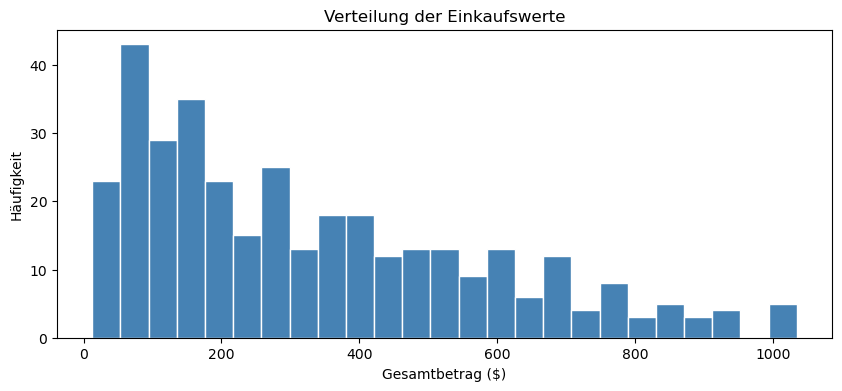

In [36]:
import matplotlib.pyplot as plt

# Histogramm: Verteilung der Einkaufswerte
plt.figure(figsize=(10, 4))
df_sales['Total'].plot(kind='hist', bins=25, title='Verteilung der Einkaufswerte', color='steelblue', edgecolor='white')
plt.xlabel('Gesamtbetrag ($)')
plt.ylabel('Häufigkeit')
plt.show()

<Figure size 800x500 with 0 Axes>

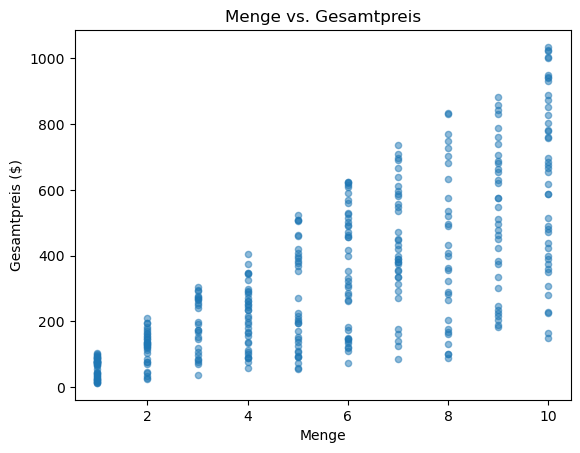

In [37]:
# Streudiagramm: Zusammenhang zwischen Menge und Gesamtpreis
plt.figure(figsize=(8, 5))
df_sales.plot(kind='scatter', x='Quantity', y='Total', alpha=0.5, title='Menge vs. Gesamtpreis')
plt.xlabel('Menge')
plt.ylabel('Gesamtpreis ($)')
plt.show()

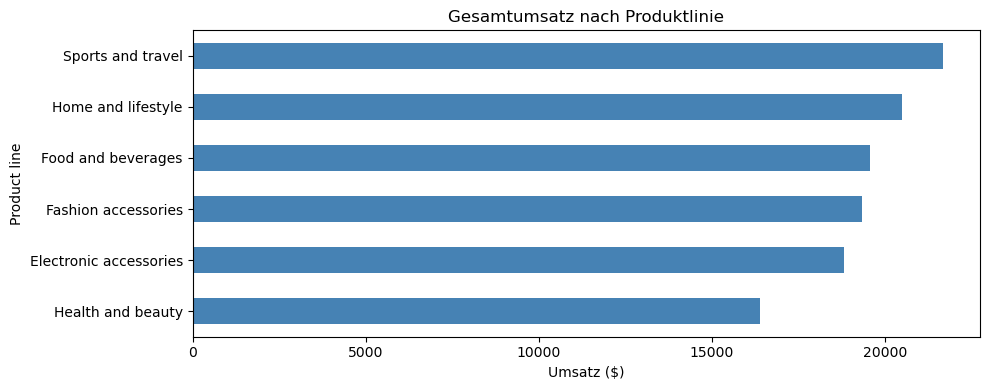

In [38]:
# Balkendiagramm: Umsatz pro Produktlinie
plt.figure(figsize=(10, 4))
df_sales.groupby('Product line')['Total'].sum().sort_values().plot(
    kind='barh', 
    title='Gesamtumsatz nach Produktlinie',
    color='steelblue'
)
plt.xlabel('Umsatz ($)')
plt.tight_layout()
plt.show()

## Zusammenfassung

In diesem Notebook hast du gelernt:

### Grundlagen
- **Series und DataFrame** als zentrale Datenstrukturen
- Daten aus **CSV**, **Excel** und **JSON** importieren/exportieren

### Dateninspektion (essentiell!)
- **`df.info()`** – Datenqualität auf einen Blick (Typen, Nullwerte, Speicher)
- **`df.describe()`** – Statistische Kennzahlen automatisch berechnen
- **`df.value_counts()`** – Häufigkeitsverteilung kategorischer Daten

### Datenmanipulation
- Selektion mit **`.loc`** (Labels) und **`.iloc`** (Positionen)
- **Bedingte Filterung** mit `&` (UND) und `|` (ODER)
- **Fehlende Werte** erkennen und behandeln
- **Neue Spalten** mit `apply()` erstellen

### Analyse
- **Gruppierung** mit `groupby()` für aggregierte Auswertungen
- **Mehrfache Aggregationen** mit `.agg()`
- **Visualisierungen** direkt aus Pandas

---

**Nächste Schritte:** 
- Übe mit eigenen Datensätzen
- Erkunde `merge()` und `concat()` für das Zusammenführen von Daten
- Lerne fortgeschrittene Visualisierung mit Seaborn/Matplotlib